<a href="https://colab.research.google.com/github/akashmeruva9/Machine-Learning/blob/main/ML_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab-6 [28/02/2024]

### 1. Implement K-NN Classifier for classification of any dataset of your choice.
### a. Load an existing data set
### b. Split the data set to train and test sets
### c. Test your model using test set. Find accuracy and confusion Matrix.
### d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vsaccuracy” and find out the value of k for maximum accuracy for the test samples.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv("weatherdata.csv")
df.head()

,Outlook,Temperature,Humidity,Wind,Answer
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import numpy as np
from collections import Counter

X = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y = df['Answer']

# Split the data into training and testing sets
# Here the data is Spilited in 80:20 ratio
#80 is for training , 20 is for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

class KNNClassifier:

    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for i in range(len(X_test)):
            distances = []
            for j in range(len(self.X_train)):
                # For simplicity, calculate distance as the number of mismatched values
                distance = np.sum(X_test[i] != self.X_train[j])
                distances.append((distance, self.y_train[j]))
            distances.sort(key=lambda x: x[0])
            nearest_neighbors = distances[:self.k]
            neighbor_labels = [neighbor[1] for neighbor in nearest_neighbors]
            most_common_label = Counter(neighbor_labels).most_common(1)[0][0]
            predictions.append(most_common_label)
        return predictions

# Initialize the K-NN Classifier
knn = KNNClassifier(k=3)

# Fit the model
knn.fit(X_train.values, y_train.values)

# Make predictions on test set
predictions = knn.predict(X_test.values)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

X_train shape: (12, 4)
X_test shape: (4, 4)
y_train shape: (12,)
y_test shape: (4,)
Accuracy: 0.0
Confusion Matrix:
[[0 3 0]
 [0 0 0]
 [0 1 0]]


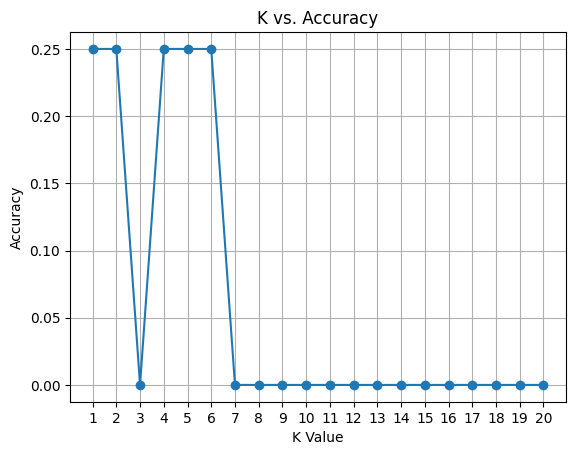

Maximum accuracy: 0.25 for K = 1


In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define a range of K values to test
k_values = range(1, 21)  # Test K from 1 to 20

# Store the accuracy for each K value
accuracies = []

for k in k_values:
    knn = KNNClassifier(k)
    knn.fit(X_train.values, y_train.values)
    predictions = knn.predict(X_test.values)
    acc = accuracy_score(y_test, predictions)
    accuracies.append(acc)

# Plot K vs. Accuracy curve
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K vs. Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the value of K for maximum accuracy
max_acc = max(accuracies)
best_k = k_values[accuracies.index(max_acc)]
print(f"Maximum accuracy: {max_acc:.2f} for K = {best_k}")
